In [1]:
# !pip install numpy pandas seaborn matplotlib
# !pip list
# !pip install sklearn

import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Read the Data
raw_train_data = pd.read_csv('./database/train.csv')
test_data = pd.read_csv('./database/test.csv')
raw_train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
raw_train_data.info()
# Insights
# Null values exists in Age (float) ==> Around 177 values out of 891 are null values
# Null values exists in Embarked (object) ==> Around 2 values out of 891 are null
# Null values exists in  Cabin (object) ==> Around 687 cabin values out of 891 are missing, contd....
# which is more than 50% ==> Replacing/predicting cabin nan values here can be bad idea

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Feature: Pclass

In [4]:
raw_train_data['Pclass'].value_counts()
# Insights: There were 3 passenger classes

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

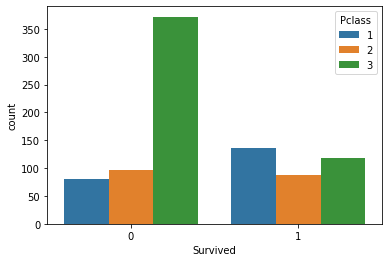

In [5]:
# Lets see if survival has any relation with passenger class
sns.countplot(x=raw_train_data['Survived'],hue=raw_train_data['Pclass'])
# Insights: Pclass 3 has least survival
# This Feature will be important for classification 

# Feature: Sex

<AxesSubplot:xlabel='Survived', ylabel='count'>

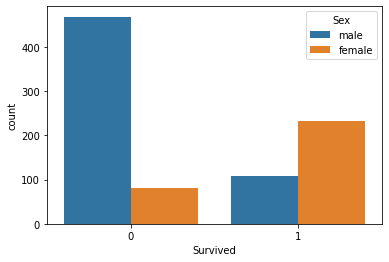

In [6]:
sns.countplot(x=raw_train_data['Survived'],hue=raw_train_data['Sex'])
# Males have very less survival rate compared to females.
# This feature is also important for classification

# Feature: Age and Cabin 

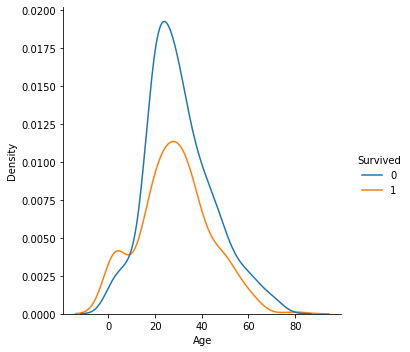

In [7]:
sns.displot(raw_train_data, x="Age", hue="Survived", kind="kde")

### Assumption 1: Missing age and cabin values can be more in case of passengers who didn't survive Lets create new features showing whether age/cabin is missing/nan or not for particular passenger id. Then, lets try to validate our assumption by plots

In [8]:
# 1 indicates value is missing/nan
raw_train_data['Age_nan_status'] = raw_train_data['Age'].map(lambda x: 1 if pd.isnull(x) else 0)
test_data['Age_nan_status'] = test_data['Age'].map(lambda x: 1 if pd.isnull(x) else 0)

In [9]:
# 1 indicates value is missing/nan
raw_train_data['Cabin_nan_status'] = raw_train_data['Cabin'].map(lambda x: 1 if pd.isnull(x) else 0)
test_data['Cabin_nan_status'] = test_data['Cabin'].map(lambda x: 1 if pd.isnull(x) else 0)

<AxesSubplot:xlabel='Survived', ylabel='count'>

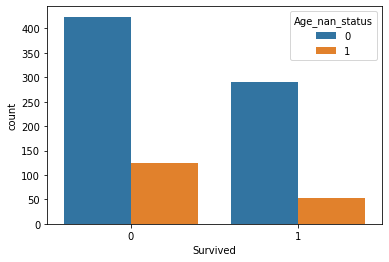

In [10]:
# plot shows missing values are more in case of the passenger who didnt survived, hence we can use this as a feature 
sns.countplot(x=raw_train_data['Survived'],hue=raw_train_data['Age_nan_status'])

<AxesSubplot:xlabel='Survived', ylabel='count'>

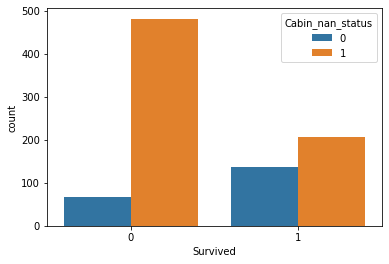

In [11]:
# plot shows missing values are more in case of the passenger who didnt survived, hence we can use this as a feature
sns.countplot(x=raw_train_data['Survived'],hue=raw_train_data['Cabin_nan_status'])

### Conclusion: Plot shows nan values are less in case where passengers have survived. Hence, Age_nan_status and Cabin_nan_status can be use as other features.

# Assumption 2: Names feature can be helpful in identifying missing age values
## Titles in name can be helpful for ages and also to predict survival

In [12]:
fn_title_extract = (lambda name: name.split(',')[1].split('.')[0])
raw_train_data['Title'] = raw_train_data['Name'].map(fn_title_extract)
raw_train_data['Title'].value_counts()

# Observations: There are some other titles like Dr, Rev, etc which all can mapped to Mr, Mrs, Master, Miss


 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 the Countess      1
 Capt              1
 Ms                1
 Sir               1
 Lady              1
 Mme               1
 Don               1
 Jonkheer          1
Name: Title, dtype: int64

In [13]:
# Mapping all titles to Mr, Mrs, Master, Miss
Mr_synonyms = ['mr','dr','rev','major','col','capt','sir','jonkheer','don']
Mrs_synonyms = ['mrs','the countess','countess','mme','lady']
Miss_synonyms = ['miss','ms','mlle']
Master_synonyms = ['master']

title_replace = (lambda title: 'mr' if title in Mr_synonyms else ('mrs' if title in Mrs_synonyms else ('miss' if title in Miss_synonyms else ('master' if title in Master_synonyms else 'mr'))))

raw_train_data['Title']= raw_train_data['Title'].map(lambda i: title_replace(i.lower().strip()))
raw_train_data.loc[(raw_train_data['Title']=='mr') & (raw_train_data['Sex']=='female') ,'Title'] = 'mrs'
raw_train_data['Title'].value_counts()
# So now we have removed all other titles, also if thr is an unknown title which doesnt lie in any list will be mapped to 'mr'

mr        537
miss      185
mrs       129
master     40
Name: Title, dtype: int64

<AxesSubplot:xlabel='Title', ylabel='Age'>

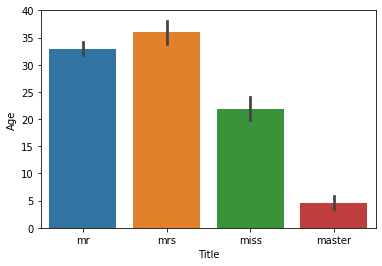

In [14]:
# Lets see Age distribution with Title
sns.barplot(data=raw_train_data, x='Title', y='Age')
# Title definitely gives good estimate of ages 
# Hence, assumption2 stands correct

#  Lets see if other features such as Pclass and Embarked can add more information on missing ages

<AxesSubplot:xlabel='Title', ylabel='Age'>

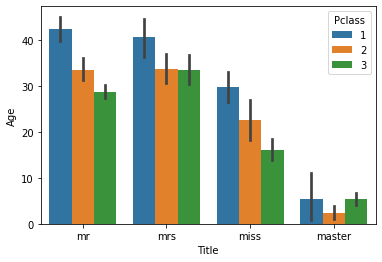

In [15]:
sns.barplot(data=raw_train_data, x='Title', y='Age',hue='Pclass')

## Family with higher ages are travelling through Pclass 1 & 2. And relatively younger families are traveling through Pclass 3 (Conclusion from above plot)

<AxesSubplot:xlabel='Title', ylabel='Age'>

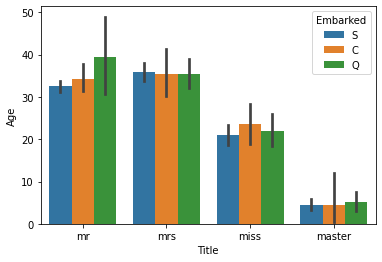

In [16]:
sns.barplot(data=raw_train_data, x='Title', y='Age',hue='Embarked')

### Embarked feature doesnt give much information on ages.

#  Hence, we use new Feature 'Title' and existing feature 'Pclass' to fill missing nan values in 'Age' Column

In [17]:
# calculating mean ages as per title and pclass
condition_mr_pclass_1 = (raw_train_data['Title']=='mr') & (raw_train_data['Pclass']==1) & (raw_train_data['Age_nan_status']==0)
condition_mr_pclass_2 = (raw_train_data['Title']=='mr') & (raw_train_data['Pclass']==2) & (raw_train_data['Age_nan_status']==0)
condition_mr_pclass_3 = (raw_train_data['Title']=='mr') & (raw_train_data['Pclass']==3) & (raw_train_data['Age_nan_status']==0)
mean_mr_pclass_1 = raw_train_data[condition_mr_pclass_1]['Age'].mean()
mean_mr_pclass_2 = raw_train_data[condition_mr_pclass_2]['Age'].mean()
mean_mr_pclass_3 = raw_train_data[condition_mr_pclass_3]['Age'].mean()
print('Average ages of passengers with Title Mr in pclass 1,2,3:',mean_mr_pclass_1,mean_mr_pclass_2,mean_mr_pclass_3)

Average ages of passengers with Title Mr in pclass 1,2,3: 42.38265306122449 33.58888888888889 28.724890829694324


In [18]:
# calculating mean ages as per title and pclass
condition_mrs_pclass_1 = (raw_train_data['Title']=='mrs') & (raw_train_data['Pclass']==1) & (raw_train_data['Age_nan_status']==0)
condition_mrs_pclass_2 = (raw_train_data['Title']=='mrs') & (raw_train_data['Pclass']==2) & (raw_train_data['Age_nan_status']==0)
condition_mrs_pclass_3 = (raw_train_data['Title']=='mrs') & (raw_train_data['Pclass']==3) & (raw_train_data['Age_nan_status']==0)
mean_mrs_pclass_1 = raw_train_data[condition_mrs_pclass_1]['Age'].mean()
mean_mrs_pclass_2 = raw_train_data[condition_mrs_pclass_2]['Age'].mean()
mean_mrs_pclass_3 = raw_train_data[condition_mrs_pclass_3]['Age'].mean()
print('Average ages of passengers with Title Mrs in pclass 1,2,3:',mean_mrs_pclass_1,mean_mrs_pclass_2,mean_mrs_pclass_3)

Average ages of passengers with Title Mrs in pclass 1,2,3: 40.63157894736842 33.68292682926829 33.515151515151516


In [19]:
# calculating mean ages as per title and pclass
condition_miss_pclass_1 = (raw_train_data['Title']=='miss') & (raw_train_data['Pclass']==1) & (raw_train_data['Age_nan_status']==0)
condition_miss_pclass_2 = (raw_train_data['Title']=='miss') & (raw_train_data['Pclass']==2) & (raw_train_data['Age_nan_status']==0)
condition_miss_pclass_3 = (raw_train_data['Title']=='miss') & (raw_train_data['Pclass']==3) & (raw_train_data['Age_nan_status']==0)
mean_miss_pclass_1 = raw_train_data[condition_miss_pclass_1]['Age'].mean()
mean_miss_pclass_2 = raw_train_data[condition_miss_pclass_2]['Age'].mean()
mean_miss_pclass_3 = raw_train_data[condition_miss_pclass_3]['Age'].mean()
print('Average ages of passengers with Title Miss in pclass 1,2,3:',mean_miss_pclass_1,mean_miss_pclass_2,mean_miss_pclass_3)

Average ages of passengers with Title Miss in pclass 1,2,3: 29.74468085106383 22.560606060606062 16.1231884057971


In [20]:
# calculating mean ages as per title and pclass
condition_master_pclass_1 = (raw_train_data['Title']=='master') & (raw_train_data['Pclass']==1) & (raw_train_data['Age_nan_status']==0)
condition_master_pclass_2 = (raw_train_data['Title']=='master') & (raw_train_data['Pclass']==2) & (raw_train_data['Age_nan_status']==0)
condition_master_pclass_3 = (raw_train_data['Title']=='master') & (raw_train_data['Pclass']==3) & (raw_train_data['Age_nan_status']==0)
mean_master_pclass_1 = raw_train_data[condition_master_pclass_1]['Age'].mean()
mean_master_pclass_2 = raw_train_data[condition_master_pclass_2]['Age'].mean()
mean_master_pclass_3 = raw_train_data[condition_master_pclass_3]['Age'].mean()
print('Average ages of passengers with Title Master in pclass 1,2,3:',mean_master_pclass_1,mean_master_pclass_2,mean_master_pclass_3)

Average ages of passengers with Title Master in pclass 1,2,3: 5.306666666666667 2.2588888888888885 5.350833333333334


In [21]:
# Filling mean values for mr title
condition_mr_pclass_1_nan = (raw_train_data['Title']=='mr') & (raw_train_data['Pclass']==1) & (raw_train_data['Age_nan_status']==1)
condition_mr_pclass_2_nan = (raw_train_data['Title']=='mr') & (raw_train_data['Pclass']==2) & (raw_train_data['Age_nan_status']==1)
condition_mr_pclass_3_nan = (raw_train_data['Title']=='mr') & (raw_train_data['Pclass']==3) & (raw_train_data['Age_nan_status']==1)
raw_train_data.loc[condition_mr_pclass_1_nan,'Age'] = mean_mr_pclass_1
raw_train_data.loc[condition_mr_pclass_2_nan,'Age'] = mean_mr_pclass_2
raw_train_data.loc[condition_mr_pclass_3_nan,'Age'] = mean_mr_pclass_3

In [22]:
# Filling mean values for mr title
condition_mrs_pclass_1_nan = (raw_train_data['Title']=='mrs') & (raw_train_data['Pclass']==1) & (raw_train_data['Age_nan_status']==1)
condition_mrs_pclass_2_nan = (raw_train_data['Title']=='mrs') & (raw_train_data['Pclass']==2) & (raw_train_data['Age_nan_status']==1)
condition_mrs_pclass_3_nan = (raw_train_data['Title']=='mrs') & (raw_train_data['Pclass']==3) & (raw_train_data['Age_nan_status']==1)
raw_train_data.loc[condition_mrs_pclass_1_nan,'Age'] = mean_mrs_pclass_1
raw_train_data.loc[condition_mrs_pclass_2_nan,'Age'] = mean_mrs_pclass_2
raw_train_data.loc[condition_mrs_pclass_3_nan,'Age'] = mean_mrs_pclass_3

In [23]:
# Filling mean values for mr title
condition_miss_pclass_1_nan = (raw_train_data['Title']=='miss') & (raw_train_data['Pclass']==1) & (raw_train_data['Age_nan_status']==1)
condition_miss_pclass_2_nan = (raw_train_data['Title']=='miss') & (raw_train_data['Pclass']==2) & (raw_train_data['Age_nan_status']==1)
condition_miss_pclass_3_nan = (raw_train_data['Title']=='miss') & (raw_train_data['Pclass']==3) & (raw_train_data['Age_nan_status']==1)
raw_train_data.loc[condition_miss_pclass_1_nan,'Age'] = mean_miss_pclass_1
raw_train_data.loc[condition_miss_pclass_2_nan,'Age'] = mean_miss_pclass_2
raw_train_data.loc[condition_miss_pclass_3_nan,'Age'] = mean_miss_pclass_3

In [24]:
# Filling mean values for mr title
condition_master_pclass_1_nan = (raw_train_data['Title']=='master') & (raw_train_data['Pclass']==1) & (raw_train_data['Age_nan_status']==1)
condition_master_pclass_2_nan = (raw_train_data['Title']=='master') & (raw_train_data['Pclass']==2) & (raw_train_data['Age_nan_status']==1)
condition_master_pclass_3_nan = (raw_train_data['Title']=='master') & (raw_train_data['Pclass']==3) & (raw_train_data['Age_nan_status']==1)
raw_train_data.loc[condition_master_pclass_1_nan,'Age'] = mean_master_pclass_1
raw_train_data.loc[condition_master_pclass_2_nan,'Age'] = mean_master_pclass_2
raw_train_data.loc[condition_master_pclass_3_nan,'Age'] = mean_master_pclass_3

In [25]:
raw_train_data[raw_train_data['Age_nan_status']==1]['Age'] 
# confirming if all nan values are replaced

5      28.724891
17     33.588889
19     33.515152
26     28.724891
28     16.123188
         ...    
859    28.724891
863    16.123188
868    28.724891
878    28.724891
888    16.123188
Name: Age, Length: 177, dtype: float64

<AxesSubplot:xlabel='Title', ylabel='Age'>

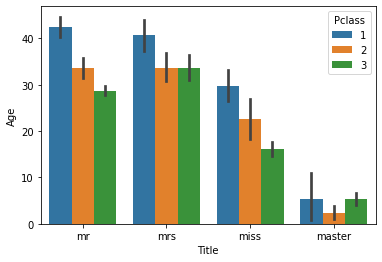

In [26]:
# Just to debug if nan values were replaced correctly. new distribution remains same as earlier
sns.barplot(data=raw_train_data, x='Title', y='Age',hue='Pclass')

## Age column nan values replaced. And, converted to discrete bins.

In [27]:
raw_train_data['Age_bins'] = pd.cut(raw_train_data.Age,bins=[0,10,20,30,40,50,60,70,80,120],labels=[1,2,3,4,5,6,7,8,9])

<AxesSubplot:xlabel='Age_bins', ylabel='count'>

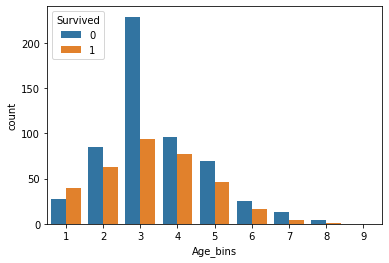

In [28]:
sns.countplot(data = raw_train_data ,x='Age_bins',hue='Survived')

# Feature: Title (Derived Feature)

<AxesSubplot:xlabel='Title', ylabel='count'>

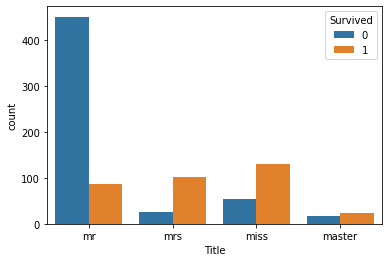

In [29]:
sns.countplot(data=raw_train_data, x='Title', hue='Survived')

# Features: group, group_wth_child, group_wth_elder, group_female_dominant 
## derived features

In [30]:
fn_surname_extract = (lambda name: name.split(',')[0])
raw_train_data['Surname'] = raw_train_data['Name'].map(fn_surname_extract)
surname_groupby = raw_train_data.groupby(['Surname','Ticket'])


<AxesSubplot:xlabel='group', ylabel='count'>

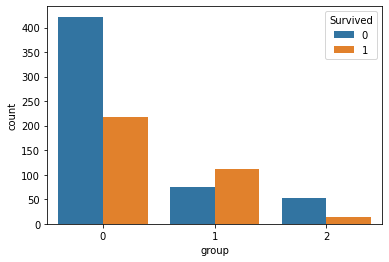

In [31]:
# 0 ==> travelling alone
# 1 ===> travelling in small group of 2 or 3 members
# 2 ====> travelling in large groups >3 members

group_size_fn = (lambda x: 0 if len(x)==1 else(1 if (len(x)>1) & (len(x)<4) else 2 ) )
raw_train_data['group'] = surname_groupby.Age.transform(group_size_fn )
sns.countplot(data=raw_train_data,x='group',hue='Survived')

<AxesSubplot:xlabel='group', ylabel='count'>

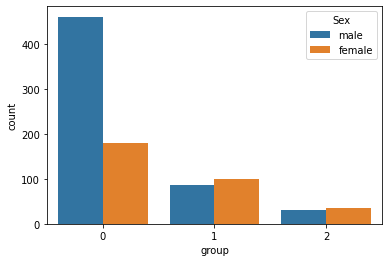

In [32]:
sns.countplot(data=raw_train_data,x='group',hue='Sex')

<AxesSubplot:xlabel='group_wth_child', ylabel='count'>

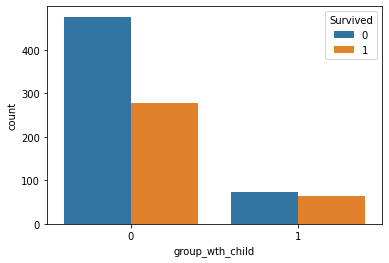

In [33]:
min_age = 15
print_fn = (lambda x: print(x))
min_age_fn = (lambda x: 1 if min(x)<min_age else 0)
raw_train_data['group_wth_child'] = surname_groupby.Age.transform(min_age_fn)
sns.countplot(data=raw_train_data,x='group_wth_child',hue='Survived')

<AxesSubplot:xlabel='group_wth_elder', ylabel='count'>

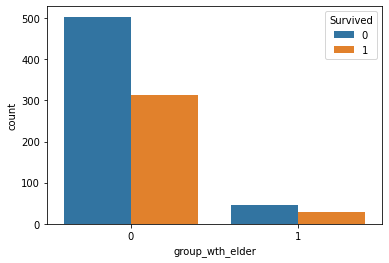

In [34]:
elder_age = 50
print_fn = (lambda x: print(x))
elder_age_fn = (lambda x: 1 if max(x)>elder_age else 0)
raw_train_data['group_wth_elder'] = surname_groupby.Age.transform(elder_age_fn)
sns.countplot(data=raw_train_data,x='group_wth_elder',hue='Survived')

<AxesSubplot:xlabel='group_female_dominant', ylabel='count'>

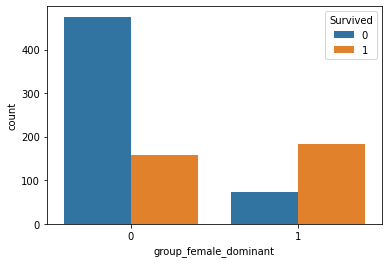

In [35]:
def count_fn(x):
    female_count = 0
    total_count = 0
    for i in x:
        total_count = total_count + 1
        if i=='female':
            female_count = female_count + 1
    return 1 if female_count/total_count > 0.5 else 0 
        
raw_train_data['group_female_dominant'] = surname_groupby.Sex.transform(count_fn)
sns.countplot(data=raw_train_data,x='group_female_dominant',hue='Survived')

# Feature: Cabin 

In [36]:
raw_train_data['cabin_init'] = raw_train_data['Cabin'].map(lambda x: x if pd.isna(x) else x[0])

<AxesSubplot:xlabel='Survived', ylabel='count'>

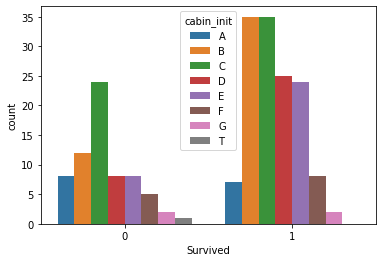

In [37]:
sns.countplot(data=raw_train_data, x='Survived', hue='cabin_init',hue_order=['A','B','C','D','E','F','G','T'])

# Feature: SibSp and Parch

In [38]:
raw_train_data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [39]:
raw_train_data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

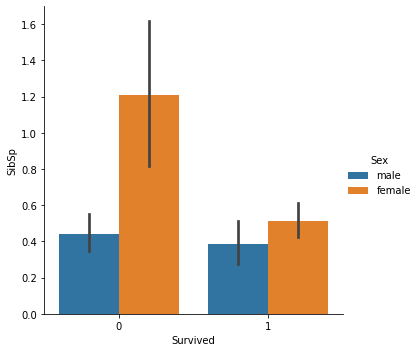

In [40]:
sns.catplot(data = raw_train_data,x='Survived',y='SibSp',kind='bar',hue='Sex')

<AxesSubplot:xlabel='Parch', ylabel='count'>

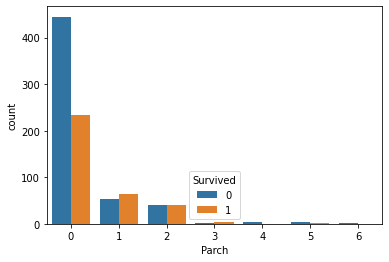

In [41]:
sns.countplot(x=raw_train_data['Parch'],hue=raw_train_data['Survived'])

<AxesSubplot:xlabel='SibSp', ylabel='count'>

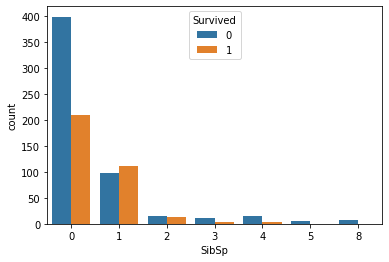

In [42]:
sns.countplot(x=raw_train_data['SibSp'],hue=raw_train_data['Survived'])

In [43]:
raw_train_data['SibSp_depend'] = raw_train_data['SibSp'].map(lambda x: 1 if x>0 else 0 )

In [44]:
 raw_train_data['Parch_depend'] = raw_train_data['Parch'].map(lambda x: 1 if x>0 else 0 )

# Feature: Ticket

In [45]:
raw_train_data['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

# Derived Feature: Ticket Length

<AxesSubplot:xlabel='Ticket_length', ylabel='count'>

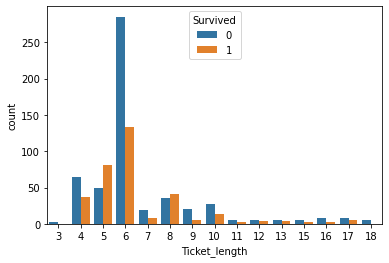

In [46]:
raw_train_data['Ticket_length'] = raw_train_data['Ticket'].map(lambda x: len(x))
sns.countplot(data = raw_train_data,x='Ticket_length',hue='Survived')

<AxesSubplot:xlabel='Ticket_length', ylabel='count'>

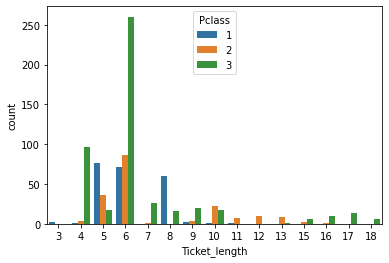

In [47]:
sns.countplot(data = raw_train_data,x='Ticket_length',hue='Pclass')

<AxesSubplot:xlabel='Ticket_length_bins', ylabel='count'>

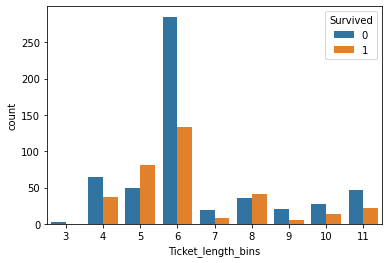

In [48]:
raw_train_data['Ticket_length_bins'] = pd.cut(raw_train_data['Ticket_length'],bins=[0,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,20],labels=[3,4,5,6,7,8,9,10,11])
sns.countplot(data=raw_train_data,x='Ticket_length_bins',hue='Survived')

# Feature: Fare

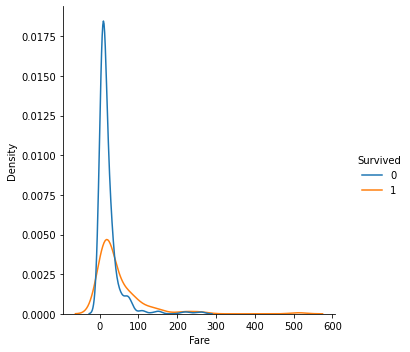

In [49]:
sns.displot(raw_train_data, x="Fare", hue="Survived", kind="kde")

In [50]:
raw_train_data['Fare_bins'] = pd.cut(raw_train_data.Fare,bins=[-5,50,100,150,200,250,300,1000],labels=[1,2,3,4,5,6,7])

<AxesSubplot:xlabel='Fare_bins', ylabel='count'>

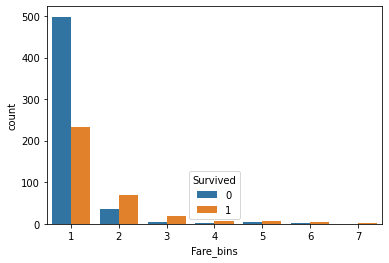

In [51]:
sns.countplot(data=raw_train_data,x='Fare_bins',hue='Survived')

# Feature: Embarked

<AxesSubplot:xlabel='Embarked', ylabel='count'>

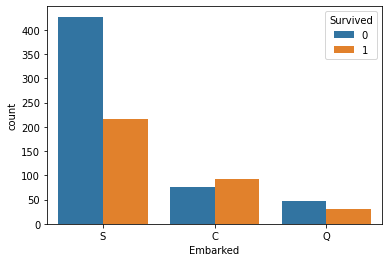

In [52]:
sns.countplot(data = raw_train_data,x='Embarked',hue='Survived')

# Encoding

In [53]:
# Encoding required

# Sex ===> Ordinal
# Title ===> Onehot
# Embarked ===> Onehot
# Ticket Length
# Pclass # Ordinal encoding can also work


# Encoding Not required

# Age ==> Divide into bins
# Fare ==> Divide into bins
# Cabin_nan_status
# Age_nan_status 
# Group

In [54]:
from sklearn.preprocessing import OneHotEncoder 

In [55]:
one_hot_obj = OneHotEncoder() # Creating Object OneHot encoding Object
one_hot_array = one_hot_obj.fit_transform(raw_train_data[['Pclass','Title','Embarked','cabin_init','Ticket_length_bins']]) # Outputs sparse matrix for space saving
type(one_hot_array)

scipy.sparse.csr.csr_matrix

In [56]:
one_hot_obj.categories_

[array([1, 2, 3]),
 array(['master', 'miss', 'mr', 'mrs'], dtype=object),
 array(['C', 'Q', 'S', nan], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', nan], dtype=object),
 array([ 3,  4,  5,  6,  7,  8,  9, 10, 11])]

In [57]:
X = pd.DataFrame()  # X is training Data
X[['Pclass_1','Pclass_2','Pclass_3','master', 'miss', 'mr', 'mrs','C', 'Q', 'S', 'nan','cabin_A', 'cabin_B', 'cabin_C', 'cabin_D', 'cabin_E', 'cabin_F', 'cabin_G', 'cabin_T', 'cabin_nan','Tick_len_3',  'Tick_len_4',  'Tick_len_5',  'Tick_len_6',  'Tick_len_7',  'Tick_len_8',  'Tick_len_9', 'Tick_len_10', 'Tick_len_11']] = one_hot_array.toarray()
X = X.drop(['nan','cabin_nan'],axis=1)
X

,Pclass_1,Pclass_2,Pclass_3,master,miss,mr,mrs,C,Q,S,...,cabin_T,Tick_len_3,Tick_len_4,Tick_len_5,Tick_len_6,Tick_len_7,Tick_len_8,Tick_len_9,Tick_len_10,Tick_len_11
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
887,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
888,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
889,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [58]:
raw_train_data.head() # For verification, if encoding is correct

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,group,group_wth_child,group_wth_elder,group_female_dominant,cabin_init,SibSp_depend,Parch_depend,Ticket_length,Ticket_length_bins,Fare_bins
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,NaN,1,0,9,9,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,1,C,1,0,8,8,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,1,NaN,0,0,16,11,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,0,0,0,C,1,0,6,6,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,NaN,0,0,6,6,1


# Feature: Sex ==> Encoding

In [59]:
from sklearn.preprocessing import OrdinalEncoder 

In [60]:
Sex_ordinal_encod_obj = OrdinalEncoder()
X['Sex'] = Sex_ordinal_encod_obj.fit_transform(raw_train_data[['Sex']])
X

,Pclass_1,Pclass_2,Pclass_3,master,miss,mr,mrs,C,Q,S,...,Tick_len_3,Tick_len_4,Tick_len_5,Tick_len_6,Tick_len_7,Tick_len_8,Tick_len_9,Tick_len_10,Tick_len_11,Sex
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
887,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
888,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
889,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [61]:
Sex_ordinal_encod_obj.categories_

[array(['female', 'male'], dtype=object)]

In [62]:
y = raw_train_data['Survived']

In [63]:
X[['Age_bins','Fare_bins','Cabin_nan_status','Age_nan_status','SibSp','Parch','group','group_wth_child','group_wth_elder','group_female_dominant']] = raw_train_data[['Age_bins','Fare_bins','Cabin_nan_status','Age_nan_status','SibSp','Parch','group','group_wth_child','group_wth_elder','group_female_dominant']]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Pclass_1               891 non-null    float64 
 1   Pclass_2               891 non-null    float64 
 2   Pclass_3               891 non-null    float64 
 3   master                 891 non-null    float64 
 4   miss                   891 non-null    float64 
 5   mr                     891 non-null    float64 
 6   mrs                    891 non-null    float64 
 7   C                      891 non-null    float64 
 8   Q                      891 non-null    float64 
 9   S                      891 non-null    float64 
 10  cabin_A                891 non-null    float64 
 11  cabin_B                891 non-null    float64 
 12  cabin_C                891 non-null    float64 
 13  cabin_D                891 non-null    float64 
 14  cabin_E                891 non-null    flo

# Classification Algorithm 

# Stochastic Gradient Classifier

In [64]:
from sklearn.linear_model import SGDClassifier

In [65]:
sgd_clf = SGDClassifier(random_state=42)


In [66]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X, y, cv=3, scoring="accuracy")

array([0.68350168, 0.78787879, 0.8047138 ])

# Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=4)
cross_val_score(forest_clf, X, y, cv=3)

array([0.77441077, 0.81481481, 0.80808081])

In [68]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=43)
cross_val_score(forest_clf, X, y, cv=10)

array([0.8       , 0.82022472, 0.71910112, 0.86516854, 0.86516854,
       0.83146067, 0.75280899, 0.78651685, 0.83146067, 0.86516854])

In [69]:
X_new = X.drop(['group','group_wth_child','group_wth_elder','group_female_dominant'],axis=1)
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=4)
cross_val_score(forest_clf, X_new, y, cv=10)

array([0.78888889, 0.79775281, 0.70786517, 0.86516854, 0.85393258,
       0.82022472, 0.76404494, 0.7752809 , 0.85393258, 0.85393258])

# Test data

In [70]:
fn_title_extract = (lambda name: name.split(',')[1].split('.')[0])
test_data['Title'] = test_data['Name'].map(fn_title_extract)
test_data['Title'].value_counts()

 Mr        240
 Miss       78
 Mrs        72
 Master     21
 Col         2
 Rev         2
 Ms          1
 Dr          1
 Dona        1
Name: Title, dtype: int64

In [71]:
# Mapping all titles to Mr, Mrs, Master, Miss
Mr_synonyms = ['mr','dr','rev','major','col','capt','sir','jonkheer','don']
Mrs_synonyms = ['mrs','the countess','countess','mme','lady']
Miss_synonyms = ['miss','ms','mlle']
Master_synonyms = ['master']

title_replace = (lambda title: 'mr' if title in Mr_synonyms else ('mrs' if title in Mrs_synonyms else ('miss' if title in Miss_synonyms else ('master' if title in Master_synonyms else 'mr'))))

test_data['Title']= test_data['Title'].map(lambda i: title_replace(i.lower().strip()))
test_data.loc[(test_data['Title']=='mr') & (test_data['Sex']=='female') ,'Title'] = 'mrs'
test_data['Title'].value_counts()

mr        245
miss       79
mrs        73
master     21
Name: Title, dtype: int64

In [72]:
# Filling mean values for mr title
condition_mr_pclass_1_nan = (test_data['Title']=='mr') & (test_data['Pclass']==1) & (test_data['Age_nan_status']==1)
condition_mr_pclass_2_nan = (test_data['Title']=='mr') & (test_data['Pclass']==2) & (test_data['Age_nan_status']==1)
condition_mr_pclass_3_nan = (test_data['Title']=='mr') & (test_data['Pclass']==3) & (test_data['Age_nan_status']==1)
test_data.loc[condition_mr_pclass_1_nan,'Age'] = mean_mr_pclass_1
test_data.loc[condition_mr_pclass_2_nan,'Age'] = mean_mr_pclass_2
test_data.loc[condition_mr_pclass_3_nan,'Age'] = mean_mr_pclass_3

In [73]:
condition_mrs_pclass_1_nan = (test_data['Title']=='mrs') & (test_data['Pclass']==1) & (test_data['Age_nan_status']==1)
condition_mrs_pclass_2_nan = (test_data['Title']=='mrs') & (test_data['Pclass']==2) & (test_data['Age_nan_status']==1)
condition_mrs_pclass_3_nan = (test_data['Title']=='mrs') & (test_data['Pclass']==3) & (test_data['Age_nan_status']==1)
test_data.loc[condition_mrs_pclass_1_nan,'Age'] = mean_mrs_pclass_1
test_data.loc[condition_mrs_pclass_2_nan,'Age'] = mean_mrs_pclass_2
test_data.loc[condition_mrs_pclass_3_nan,'Age'] = mean_mrs_pclass_3

In [74]:
condition_miss_pclass_1_nan = (test_data['Title']=='miss') & (test_data['Pclass']==1) & (test_data['Age_nan_status']==1)
condition_miss_pclass_2_nan = (test_data['Title']=='miss') & (test_data['Pclass']==2) & (test_data['Age_nan_status']==1)
condition_miss_pclass_3_nan = (test_data['Title']=='miss') & (test_data['Pclass']==3) & (test_data['Age_nan_status']==1)
test_data.loc[condition_miss_pclass_1_nan,'Age'] = mean_miss_pclass_1
test_data.loc[condition_miss_pclass_2_nan,'Age'] = mean_miss_pclass_2
test_data.loc[condition_miss_pclass_3_nan,'Age'] = mean_miss_pclass_3

In [75]:
condition_master_pclass_1_nan = (test_data['Title']=='master') & (test_data['Pclass']==1) & (test_data['Age_nan_status']==1)
condition_master_pclass_2_nan = (test_data['Title']=='master') & (test_data['Pclass']==2) & (test_data['Age_nan_status']==1)
condition_master_pclass_3_nan = (test_data['Title']=='master') & (test_data['Pclass']==3) & (test_data['Age_nan_status']==1)
test_data.loc[condition_master_pclass_1_nan,'Age'] = mean_master_pclass_1
test_data.loc[condition_master_pclass_2_nan,'Age'] = mean_master_pclass_2
test_data.loc[condition_master_pclass_3_nan,'Age'] = mean_master_pclass_3

In [76]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       418 non-null    int64  
 1   Pclass            418 non-null    int64  
 2   Name              418 non-null    object 
 3   Sex               418 non-null    object 
 4   Age               418 non-null    float64
 5   SibSp             418 non-null    int64  
 6   Parch             418 non-null    int64  
 7   Ticket            418 non-null    object 
 8   Fare              417 non-null    float64
 9   Cabin             91 non-null     object 
 10  Embarked          418 non-null    object 
 11  Age_nan_status    418 non-null    int64  
 12  Cabin_nan_status  418 non-null    int64  
 13  Title             418 non-null    object 
dtypes: float64(2), int64(6), object(6)
memory usage: 45.8+ KB


In [77]:
test_data['cabin_init'] = test_data['Cabin'].map(lambda x: x if pd.isna(x) else x[0])

In [78]:
test_data['Ticket_length'] = test_data['Ticket'].map(lambda x: len(x))
test_data['Ticket_length_bins'] = pd.cut(test_data['Ticket_length'],bins=[0,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,20],labels=[3,4,5,6,7,8,9,10,11])

In [79]:
test_data['Surname'] = test_data['Name'].map(fn_surname_extract)
test_data_surname_groupby = test_data.groupby(['Surname','Ticket'])


# 0 ==> travelling alone
# 1 ===> travelling in small group of 2 or 3 members
# 2 ====> travelling in large groups >3 members


test_data['group'] = test_data_surname_groupby.Age.transform(group_size_fn )


test_data['group_wth_child'] = test_data_surname_groupby.Age.transform(min_age_fn)


test_data['group_wth_elder'] = test_data_surname_groupby.Age.transform(elder_age_fn)


test_data['group_female_dominant'] = test_data_surname_groupby.Sex.transform(count_fn)

In [80]:
# Encoding
#one_hot_obj = OneHotEncoder() # Creating Object OneHot encoding Object
one_hot_array = one_hot_obj.transform(test_data[['Pclass','Title','Embarked','cabin_init','Ticket_length_bins']]) # Outputs sparse matrix for space saving
type(one_hot_array)

scipy.sparse.csr.csr_matrix

In [81]:
X_test = pd.DataFrame()  # X is training Data
X_test[['Pclass_1','Pclass_2','Pclass_3','master', 'miss', 'mr', 'mrs','C', 'Q', 'S','nan','cabin_A', 'cabin_B', 'cabin_C', 'cabin_D', 'cabin_E', 'cabin_F', 'cabin_G', 'cabin_T', 'cabin_nan','Tick_len_3',  'Tick_len_4',  'Tick_len_5',  'Tick_len_6',  'Tick_len_7',  'Tick_len_8',  'Tick_len_9', 'Tick_len_10', 'Tick_len_11']] = one_hot_array.toarray()
X_test = X_test.drop(['nan','cabin_nan'],axis=1)
X_test

,Pclass_1,Pclass_2,Pclass_3,master,miss,mr,mrs,C,Q,S,...,cabin_T,Tick_len_3,Tick_len_4,Tick_len_5,Tick_len_6,Tick_len_7,Tick_len_8,Tick_len_9,Tick_len_10,Tick_len_11
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
414,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
415,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
416,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [82]:
one_hot_obj.categories_

[array([1, 2, 3]),
 array(['master', 'miss', 'mr', 'mrs'], dtype=object),
 array(['C', 'Q', 'S', nan], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', nan], dtype=object),
 array([ 3,  4,  5,  6,  7,  8,  9, 10, 11])]

In [83]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Cabin_nan_status,Title,cabin_init,Ticket_length,Ticket_length_bins,Surname,group,group_wth_child,group_wth_elder,group_female_dominant
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,1,mr,NaN,6,6,Kelly,0,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,1,mrs,NaN,6,6,Wilkes,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,1,mr,NaN,6,6,Myles,0,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,1,mr,NaN,6,6,Wirz,0,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,1,mrs,NaN,7,7,Hirvonen,0,0,0,1


In [84]:
#Sex_ordinal_encod_obj = OrdinalEncoder()
X_test['Sex'] = Sex_ordinal_encod_obj.transform(test_data[['Sex']])
X_test

,Pclass_1,Pclass_2,Pclass_3,master,miss,mr,mrs,C,Q,S,...,Tick_len_3,Tick_len_4,Tick_len_5,Tick_len_6,Tick_len_7,Tick_len_8,Tick_len_9,Tick_len_10,Tick_len_11,Sex
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
414,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
415,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
416,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [85]:
test_data['Age_bins'] = pd.cut(test_data.Age,bins=[0,10,20,30,40,50,60,70,80,120],labels=[1,2,3,4,5,6,7,8,9])

In [86]:
test_data['Fare_bins'] = pd.cut(test_data.Fare,bins=[-5,50,100,150,200,250,300,1000],labels=[1,2,3,4,5,6,7])

In [87]:
# version 1
#X_test[['Age','Cabin_nan_status','Age_nan_status','SibSp','Parch']] = test_data[['Age','Cabin_nan_status','Age_nan_status','SibSp','Parch']]
# X_test

In [88]:
# version 2
X_test[['Age_bins','Fare_bins','Cabin_nan_status','Age_nan_status','SibSp','Parch','group','group_wth_child','group_wth_elder','group_female_dominant']] = test_data[['Age_bins','Fare_bins','Cabin_nan_status','Age_nan_status','SibSp','Parch','group','group_wth_child','group_wth_elder','group_female_dominant']]
mean_fare = raw_train_data['Fare'].mean()
X_test.loc[pd.isnull(X_test['Fare_bins']),['Fare_bins']] = 1

# Classification

In [89]:
X

,Pclass_1,Pclass_2,Pclass_3,master,miss,mr,mrs,C,Q,S,...,Age_bins,Fare_bins,Cabin_nan_status,Age_nan_status,SibSp,Parch,group,group_wth_child,group_wth_elder,group_female_dominant
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3,1,1,0,1,0,0,0,0,0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,4,2,0,0,1,0,0,0,0,1
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,1,1,0,0,0,0,0,0,1
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,4,2,0,0,1,0,1,0,0,0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,4,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3,1,1,0,0,0,0,0,0,0
887,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,2,1,0,0,0,0,0,0,0,1
888,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,2,1,1,1,1,2,1,0,0,0
889,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,0,0,0,0,0,0,0


In [90]:
X_test

,Pclass_1,Pclass_2,Pclass_3,master,miss,mr,mrs,C,Q,S,...,Age_bins,Fare_bins,Cabin_nan_status,Age_nan_status,SibSp,Parch,group,group_wth_child,group_wth_elder,group_female_dominant
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,4,1,1,0,0,0,0,0,0,0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,5,1,1,0,1,0,0,0,0,1
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,7,1,1,0,0,0,0,0,1,0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3,1,1,0,0,0,0,0,0,0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,3,1,1,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3,1,1,1,0,0,0,0,0,0
414,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,4,3,0,0,0,0,0,0,0,1
415,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,4,1,1,0,0,0,0,0,0,0
416,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3,1,1,1,0,0,0,0,0,0


# Final Predictions

In [91]:
sgd_clf_2 = SGDClassifier(random_state=42)
sgd_clf_2.fit(X, y)
y_test = sgd_clf_2.predict(X_test)
y_test
output = pd.DataFrame()
output['PassengerId'] = test_data['PassengerId']
output['Survived'] = y_test

In [92]:
output.to_csv('output.csv',index=False)

In [93]:
best_rf = RandomForestClassifier(random_state=121, criterion='entropy', max_depth=9, min_samples_leaf=5, min_samples_split=2, n_estimators=50)
X_new = X.drop(['group_female_dominant','group'],axis=1)
X_test_new = X_test.drop(['group_female_dominant','group'],axis=1)
best_rf.fit(X, y)
y_test = best_rf.predict(X_test)
output = pd.DataFrame()
output['PassengerId'] = test_data['PassengerId']
output['Survived'] = y_test
output.to_csv('output_1.csv',index=False)